<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.6/Autoencoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder

- MNIST dataset 사용
- Unsupervised learning <br>
    -> label 불필요

In [4]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import random
import torch

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cpu


In [7]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

[1] Data

(60000, 784)
(10000, 784)


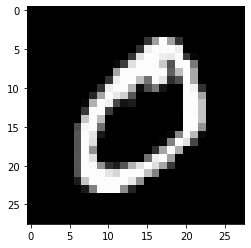

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# normalize (pixel을 나누어 0~1사이의 범위를 갖도록 바꿈)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# 이미지 확인
plt.imshow(x_train[1], cmap = 'gray')

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

[2] Model

In [22]:
# parameter 지정
learning_rate = 0.01
epoch = 20
batch_size = 128
num_hidden = 256
size_input = 784
# 28*28 = 784


In [23]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    
    self.encoder = nn.Linear(size_input, num_hidden)
    self.decoder = nn.Linear(num_hidden, size_input)

  def forward(self, x):
    z_vector = self.encoder(x)

    output = self.decoder(z_vector)

    return torch.sigmoid(output)

model = Autoencoder().to(device)
model


# optimizer 설정
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [24]:
# loss function
loss_function = nn.MSELoss()

In [25]:
# Batch size만큼 나눠서 data load
# batch size 만큼 나누어서 data를 로드
train_loader = torch.utils.data.DataLoader(x_train ,batch_size=batch_size, shuffle=True,  drop_last=False)
# drop last를 False로 지정해 마지막까지 training 시킬 수 있도록 함

# batch size of test data => 전체 데이터를 하나의 배치로 크게 묶어줌
test_loader = torch.utils.data.DataLoader(x_test, batch_size=len(x_test), shuffle=False, drop_last=False)

[3] Training

In [31]:
total_batch = len(train_loader)
print(total_batch)

for num_epoch in range(epoch):
  avg_loss = 0
  for batch_num, images in enumerate(train_loader):
    x = images.to(device)
    x = x.reshape(-1, 784)

    optimizer.zero_grad()

    output = model(x).to(device)

    loss = loss_function(output, x).to(device)
    loss.backward()

    avg_loss += (loss/total_batch)

    # update
    optimizer.step()
    
  print("Epoch = {} loss = {:.6f}".format(num_epoch+1, avg_loss))

469
Epoch = 1 loss = 0.001632
Epoch = 2 loss = 0.001626
Epoch = 3 loss = 0.001638
Epoch = 4 loss = 0.001644
Epoch = 5 loss = 0.001664
Epoch = 6 loss = 0.001637
Epoch = 7 loss = 0.001642
Epoch = 8 loss = 0.001653
Epoch = 9 loss = 0.001639
Epoch = 10 loss = 0.001675
Epoch = 11 loss = 0.001631
Epoch = 12 loss = 0.001654
Epoch = 13 loss = 0.001656
Epoch = 14 loss = 0.001662
Epoch = 15 loss = 0.001654
Epoch = 16 loss = 0.001651
Epoch = 17 loss = 0.001651
Epoch = 18 loss = 0.001661
Epoch = 19 loss = 0.001661
Epoch = 20 loss = 0.001656


[4] Test

In [40]:
for batch_idx, image in enumerate(test_loader):
    with torch.no_grad():
        test_img = image.reshape(-1, 784).to(device)
        
        test_recon_x = model(test_img)

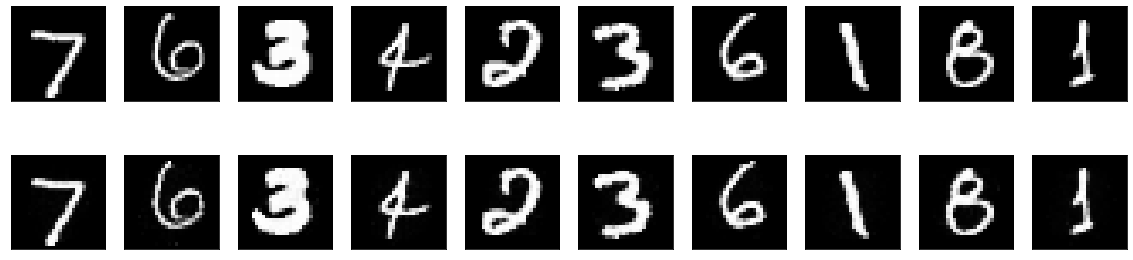

In [41]:
n = 10  # 몇개를 보일것인가
plt.figure(figsize=(20, 5)) 

for i in range(n):
    # pit.subplot(행의 갯수, 열의갯수, index )
    ax = plt.subplot(2, 10, i + 1)
    
    test_img = image[i*100].to(device) # 100개 단위로 출력
    plt.imshow(test_img.reshape(28,28), cmap='gray')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i+1+n)
    recon_image = test_recon_x[i*100].reshape(28,28)
    plt.imshow(recon_image.reshape(28,28), cmap='gray')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)